# sympy，一个可以做数学题的Python库

sympy 是 symbolic python 的简称，也就是一个支持代数符号计算的python库。

它可以用来帮助我们解决从初中数学到高等数学的各类问题，包括但不限于:

* 表达式化简，因式分解，方程求解，不等式求解。
  
* 求极限，求导，求积分，级数展开，解微分方程，级数求和。

* 求概率，求期望，方差。
  
* 矩阵乘法，求行列式，矩阵求逆，矩阵分解。

它的设计思想非常像强大的数学软件mathematica。

我一般把它理解成一个python版的mathematica~ 

本文将先演示sympy的基础使用范例，然后讲解sympy的原理。


## 〇，基本范例演示

In [2]:
import sympy
from sympy import sqrt,log,exp,sin,cos,tan,cot,Eq
from sympy import S,oo,pi
# 定义一些常见的代数符号
x,y,z,a,b,c = sympy.symbols('x,y,z,a,b,c')

In [3]:
#定义一个函数
f = sympy.Lambda(x,(x-1)/(x**2+1))
f(x)

(x - 1)/(x**2 + 1)

In [4]:
#求方程 f(x)==0 
sympy.solve(f(x),x)

[1]

In [5]:
#求极限 limit(f(x),x->∞)
sympy.limit(f(x),x,oo)

0

In [6]:
#求导数
sympy.diff(f(x),x) 

-2*x*(x - 1)/(x**2 + 1)**2 + 1/(x**2 + 1)

In [7]:
#求积分
sympy.integrate(f(x),x) 

log(x**2 + 1)/2 - atan(x)

In [8]:
#求级数展开 
sympy.series(f(x),x,0,5)

-1 + x + x**2 - x**3 - x**4 + O(x**5)

## 一，符号和数字

### 1， 定义符号

可以从 sympy.abc直接导入单字母。

可以用sympy.symbols定义多个符号。

可以用sympy.var 声明符号。

支持希腊字母，支持下标符号。

In [9]:
from sympy.abc import p,q,r

In [10]:
# 定义符号
x,y,z,a,b,c = sympy.symbols('x,y,z,a,b,c')

In [11]:
#使用希腊字母
l, r = sympy.symbols('lambda rho')
l + r**2

lambda + rho**2

In [12]:
#获取latex代码
sympy.latex((p+q+r)**2)

'\\left(p + q + \\rho\\right)^{2}'

In [13]:
#声明 x_1, z_1 为符号
#可以使用下标
sympy.var('x_1  z_1')
x_1

x_1

In [14]:
sympy.sin(pi)

0

<style>
.td{width:100px;overflow:hidden}
</style>
<table  style="width:100%">
<thead>
<tr>
  <th>假设的关键字参数</th>
  <th>属性</th>
  <th>描述</th>
</tr>
</thead>
<tbody><tr>
  <td>real, imaginary</td>
  <td>is_real, is_imaginary</td>
  <td>指定一个符号代表实数或虚数</td>
</tr>
<tr>
  <td>positive, negative</td>
  <td>is_positive, is_negative</td>
  <td>指定一个符号代表正数或负数</td>
</tr>
<tr>
  <td>integer</td>
  <td>is_integer</td>
  <td>该符号代表整数</td>
</tr>
<tr>
  <td>odd, even</td>
  <td>is_odd, is_even</td>
  <td>该符号代表奇数或偶数</td>
</tr>
<tr>
  <td>prime</td>
  <td>is_prime</td>
  <td>该符号代表质数</td>
</tr>
<tr>
  <td>finite, infinite</td>
  <td>is_finite, is_infinite</td>
  <td>该符号代表有限或无限</td>
</tr>
</tbody></table>

In [15]:
m = sympy.Symbol('m',real = True)
n = sympy.Symbol('n',integer = True)
t = sympy.Symbol('t')

In [17]:
m.is_real


True

In [16]:
t.is_positive

### 2，定义数字

sympy里的定义的符号数字可以是任意精度的。

可以用Integer,Float,Rational等类定义符号数字，也可以用S定义符号数字。

In [18]:
from sympy import S 

In [ ]:
i = S(19)
type(i)


In [19]:
u = S(3.2)
type(u)

sympy.core.numbers.Float

In [20]:
v = S('3/17')
v

3/17

In [21]:
S('sqrt(2)')

sqrt(2)

### 3， 获取数值结果

使用sympy.N或者表达式的n()方法，或者evalf()等方法可以将表达式转换成数值结果。

如果要获得表达式对多个数值计算的结果，可以用lambdify将表达式中的函数转换成对应的numpy函数。

In [22]:
from sympy import pi,sin,cos,exp,sqrt

In [23]:
pi.n(10)

3.141592654

In [24]:
pi.evalf(10)

3.141592654

In [25]:
(sin(x)**2 + cos(x)**2 - 1).subs({x:1}).n(10)

-0.e-155

设置chop= True还可以将精度导致的小尾巴割掉。

In [26]:
(sin(x)**2 + cos(x)**2 - 1).subs({x:1}).evalf(chop = True)

0

将符号函数转换成对应数值函数

In [27]:
import numpy as np 

a = np.linspace(0,2*np.pi,20)

f = sin(x) + cos(x)

fn = sympy.lambdify(x,f,modules = 'numpy')

fn(a)

array([ 1.        ,  1.27051671,  1.40335322,  1.38411464,  1.21488575,
        0.91400515,  0.5140779 ,  0.05844234, -0.40352636, -0.82176671,
       -1.15095589, -1.35542114, -1.41300548, -1.31746875, -1.07916384,
       -0.72391478, -0.29021832,  0.1749278 ,  0.62111777,  1.        ])

## 二，表达式和函数

### 1，定义表达式

符号的运算组合构成表达式，表达式是一种树形结构，由 func和args组成，表达式可以嵌套。

含有symbols符号的算式会自动对常见的四则运算和乘方等运算符进行重载。

使用sympy.sympify可以将字符串转换成对应的表达式。




In [28]:
import sympy
from sympy import S
x,y,z,a,b,c = sympy.symbols('x,y,z,a,b,c')
expr = a*x**2 + b*x + c

In [29]:
expr.func  # 相当于mathematica中表达式的Head

sympy.core.add.Add

In [30]:
expr.args # 相当于mathematica中表达式的Parts

(c, a*x**2, b*x)

In [31]:
# 以下为恒等式
expr.func(*expr.args) == expr

True

In [32]:
#使用S从字符串定义表达式
expr = sympy.S("a*x**2 + b*x + c")
expr

a*x**2 + b*x + c

In [33]:
# 转换为mathematica中表达式
sympy.mathematica_code(sympy.Integral(x**2,(x,0,2)))

'Hold[Integrate[x^2, {x, 0, 2}]]'

### 2，定义函数

函数是从一组参数符号到一个表达式的映射。

There are three types of functions implemented in SymPy:

1) defined functions (in the sense that they can be evaluated) like
   exp or sin; they have a name and a body:
       $$f = exp$$
       
2) undefined function which have a name but no body. Undefined
   functions can be defined using a Function class as follows:
       $$f = Function('f')$$
   (the result will be a Function instance)
   
3) anonymous function (or lambda function) which have a body (defined
   with dummy variables) but have no name:
       $$f = Lambda(x, exp(x)*x)$$
       $$f = Lambda((x, y), exp(x)*y)$$
       
The fourth type of functions are composites, like $(sin + cos)(x)$; these work in
SymPy core, but are not yet part of SymPy

In [34]:
import sympy

#Function定义函数：需要自定义eval才有body
f = sympy.Function('f')
f(x).diff(x).diff(x)

Derivative(f(x), (x, 2))

In [35]:
g = sympy.Function('g')
g(x,y).integrate((x,1,10))

Integral(g(x, y), (x, 1, 10))

In [36]:
from sympy import Function, S, oo, I, sin
class sinxtox(sympy.Function):
    @classmethod
    def eval(cls, x):
        if x is S(0):
            return S(1)
        elif x is S('oo'):
             return S('0')
        else:
            return sin(x)/x


In [37]:
sinxtox(0)

1

In [38]:
sinxtox(oo)

0

In [39]:
import sympy 

#Lambda定义函数：无名字有body
g = sympy.Lambda(x,1/(sympy.exp(x) + 1)) 
g(x)

1/(exp(x) + 1)

In [ ]:
# g.__name__ 将会报错

In [40]:
g(x).diff(x).diff(x)

-exp(x)/(exp(x) + 1)**2 + 2*exp(2*x)/(exp(x) + 1)**3

In [41]:
g(x).integrate((x,0,oo))

log(2)

In [42]:
type(g)

sympy.core.function.Lambda

以下定义函数的方式效果和lambda类似

In [43]:
h = lambda p,p_:p*sympy.log(p_) + (1-p)*sympy.log(1-p_) 

In [44]:
h.__name__

'<lambda>'

In [45]:
h(x,y).diff(y)

x/y - (1 - x)/(1 - y)

In [46]:
type(h)

function

### 3，表达式操控

下面介绍表达式的因式分解，展开，化简，合并同类项，替换 等操作

simplify, factor, expand, collect, apart,together, subs,xreplace, rewrite


In [47]:
import sympy
from sympy import S
from sympy import sin,cos,tan,cot,exp,log
### 化简
expr = sin(x)**2 + cos(x)**2
#expr.simplify()
sympy.simplify(expr)

1

In [48]:
### 因式分解
expr = x**3 - 1
factors = sympy.factor(expr)
factors 

(x - 1)*(x**2 + x + 1)

In [49]:
### 展开
sympy.expand(factors)

x**3 - 1

In [50]:
### 替换
expr = a*x**2 + b*x + c
expr.subs({a:1,b:2,c:1})

x**2 + 2*x + 1

In [51]:
# apart 分式展开
expr = (4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x)
ans = sympy.apart(expr)
ans 

(2*x - 1)/(x**2 + x + 1) - 1/(x + 4) + 3/x

In [52]:
# together 分式合并
ans.together().expand().together()

(4*x**3 + 21*x**2 + 10*x + 12)/(x*(x**3 + 5*x**2 + 5*x + 4))

In [53]:
### 合并同类项
expr = x**3 + x**2*y + a*x**2*z + y**2 + 5*x 
expr 

a*x**2*z + x**3 + x**2*y + 5*x + y**2

In [54]:
result = sympy.collect(expr,x)
result 

x**3 + x**2*(a*z + y) + 5*x + y**2

In [55]:
expr_dic  = sympy.collect(expr,x,evaluate= False)
expr_dic

{x**3: 1, x: 5, x**2: a*z + y, 1: y**2}

In [56]:
expr_dic[x**2]

a*z + y

In [57]:
(x**2 + x**4).subs(x**2, y)

y**2 + y

xreplace只会替换表达式中完全相同的项

In [58]:
(x**2 + x**4).xreplace({x**2: y})

x**4 + y

普通替换在逐个执行替换后会计算一次

In [59]:
((x + y)/y).subs({x + y: y, y: x + y})

1

使用simultaneous让各个替换同时完成后进行计算

In [60]:
((x + y)/y).subs({x + y: y, y: x + y}, simultaneous=True)

y/(x + y)

rewrite 可以应用数学恒等变换对表达式中的一些函数，用其它函数改写。

In [61]:
sin(x).rewrite(tan)

2*tan(x/2)/(tan(x/2)**2 + 1)

In [62]:
(sin(2*x) + cos(x) + x**2).rewrite([sin,cos],tan)

x**2 + (1 - tan(x/2)**2)/(tan(x/2)**2 + 1) + 2*tan(x)/(tan(x)**2 + 1)

In [63]:
sin(x).rewrite(exp)

-I*(exp(I*x) - exp(-I*x))/2

In [64]:
sympy.factorial(x).rewrite(sympy.gamma)

gamma(x + 1)

## 三，方程和不等式

### 1，方程求解

方程求解有solve,solveset,linsolve等函数可以使用。

In [65]:
import sympy
from sympy import S, oo, pi, I, Eq 
from sympy import log,exp,sin,cos,tan,cot
sympy.init_printing()
x,y,z,a,b,c = sympy.symbols('x,y,z,a,b,c')

In [66]:
#解方程 x**3-1==0
equation = x**3 -1 
sympy.solve(equation,x)



In [67]:
#解方程组
ans = sympy.solve((x**2 + y**2-10,2*y - x - 2),[x,y])
ans 

In [68]:
[[x.n() for x in y] for y in ans]

In [69]:
sympy.solve(2* sin(x)-1,x)

In [70]:
# linsolve可以求解线性方程组
result = sympy.linsolve([x*2 + y*3 -2, x*3+y-5],x,y)
result

In [71]:
sympy.linsolve(sympy.Matrix(([1, 1, 1, 1], [1, 1, 2, 3])), (x, y, z))

In [72]:
M = sympy.Matrix(((1, 1, 1, 1), (1, 1, 2, 3)))
system = A, b = M[:, :-1], M[:, -1]
sympy.linsolve(system, x, y, z)

In [73]:
#solveset将结果以集合形式呈现。

sympy.solveset(Eq(x**3,8), x,domain= S.Reals)

In [74]:
sympy.solveset(sin(x) - 1, x, domain=S.Reals)

### 2，不等式求解

不等式求解可以使用reduce_inequalities或者solve或者solveset等方法

In [75]:
import sympy
from sympy import S, oo, pi, I 
from sympy import log,exp,sin,cos,tan,cot

sympy.init_printing(pretty_print=True)
x,y,z,a,b,c = sympy.symbols('x,y,z,a,b,c')

In [76]:
sympy.reduce_inequalities(2*sin(x)<1, x)

In [77]:
sympy.reduce_inequalities([x**2 + 2*x>1, x<1], x)

In [78]:
sympy.solve([x**2+4*x > 10,x<10],x,domain= S.Reals)

In [79]:
sympy.solveset(x**2+4*x > 10,x,domain= S.Reals)

## 四， 函数可视化

### 1，plot范例

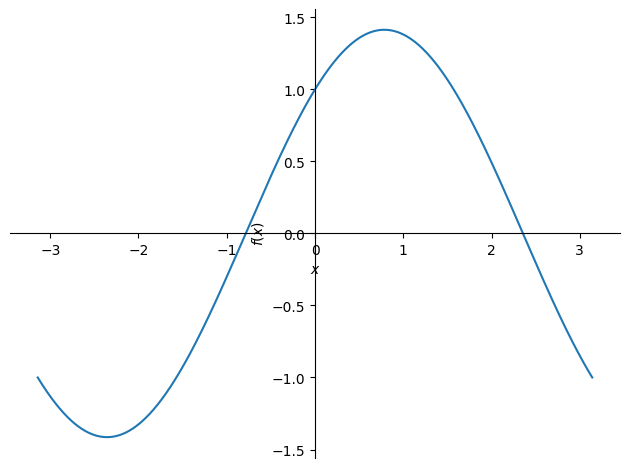

In [80]:
import sympy
from sympy import S,pi,exp,log,sin,cos,tan,cot,sqrt
import matplotlib 
%matplotlib inline 
sympy.plot(sin(x) + cos(x), (x, -pi, pi))

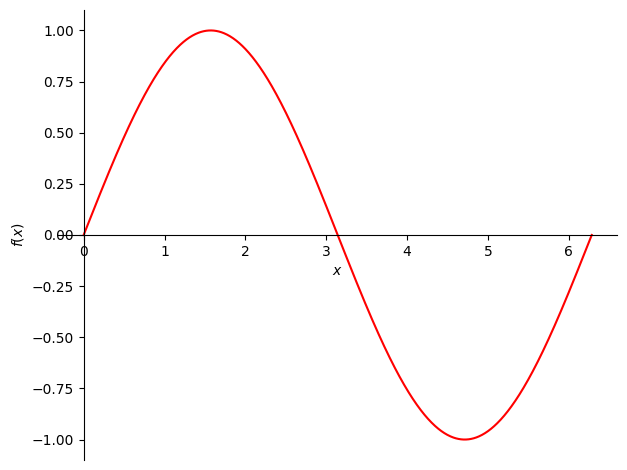

In [81]:
p1 = sympy.plot(sin(x), (x, 0, 2*pi),line_color = 'red' )


In [82]:
g1= sympy.plot(cos(x),(x,0,2*pi),show = False,line_color = 'green',ylabel = False)
g2 = sympy.plot(sin(x),(x,0,2*pi),show = False,line_color = 'red')
g1.append(g2[0])


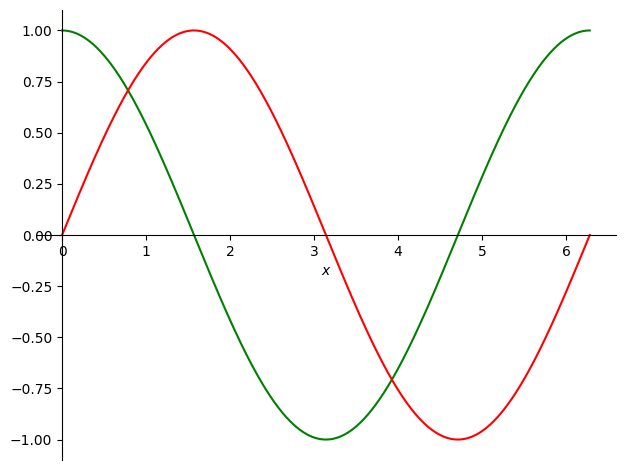

In [83]:
g1.show()

### 2，plot3d范例

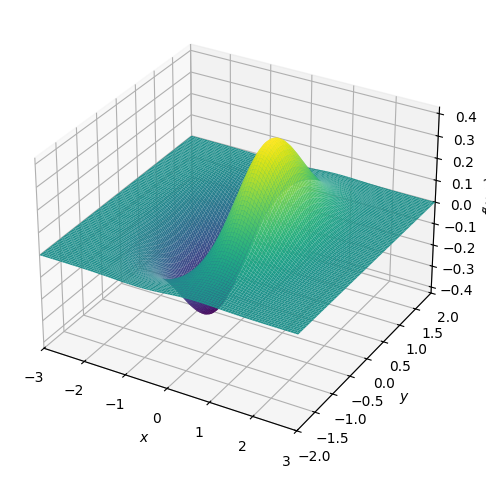

In [84]:
import sympy
from sympy import S,pi,exp,log,sin,cos,tan,cot,sqrt
import matplotlib 
%matplotlib inline 
sympy.plotting.plot3d(x*exp(-x**2-y**2), (x, -3, 3), (y, -2, 2))

### 3，textplot范例

基于纯文本可视化，不需要matplotlib

In [85]:
import sympy 
from sympy import sin
sympy.textplot(sin(t), 0, 15)

      1 |     ..                     ..                    ...  
        |    .  \                   /  .                  .     
        |        .                 .                          . 
        |   .                           .                .     \
        |         .               .                             
        |  .                             .              .       
        |          .             .                              
        | .                               .                     
        |                                              .        
        |           .           .                               
      0 |.---------------------------------.--------------------
        |                                             .         
        |            .         .                                
        |                                   .        .          
        |                     .                                 
        |             .  